## Checking

We should use an EDA to check that the values are normally distributed, along with any skew, and normal distributions. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('student_grades_dataset.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

Load dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10']] # Independent variable 
y = df['Result'] # Dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Metrics

In [ ]:
def mse(test, preds):
    print('MSE:', np.sqrt(mean_squared_error(test, preds)))

def rmse(test, preds):
    print('RMSE:', np.sqrt(mean_squared_error(test, preds)))

def mae(test, preds): 
    print('MAE:', mean_absolute_error(y_test, preds))

In [ ]:
# Use cross validation for better metrics
def cv_score(model, x, y):
    mse = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    mean_mse = np.mean(mse)
    print(mean_mse)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=10, random_state=0)
rfg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_rfg = rfg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_rfg))

-0.061583377727856936


In [ ]:
rmse(y_test, y_pred_rfg)

RMSE: 14.286601695294792


In [ ]:
mae(y_test, y_pred_rfg)

MAE: 12.041340000000002


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


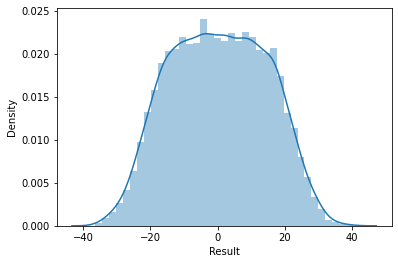

In [ ]:
sns.distplot(y_test - y_pred_rfg)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_preds_lr = lr.predict(X_test)

In [ ]:
mae(y_test, y_preds_lr)

MAE: 11.606867698344557


In [ ]:
rmse(y_test, y_preds_lr)

RMSE: 13.578647860015256


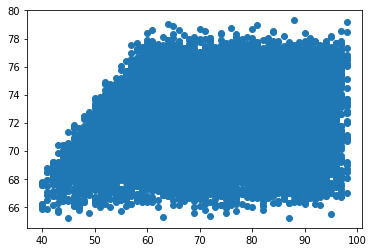

In [ ]:
plt.scatter(y_test, y_preds_lr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


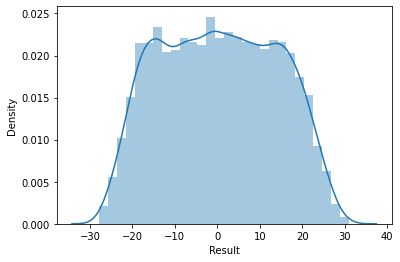

In [ ]:
sns.distplot(y_test - y_preds_lr)

In [ ]:
df_pred = pd.DataFrame(np.array([80, 80, 100, 100, 90, 90, 90, 100, 90, 80]).reshape(1, -1), 
                       columns=['Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df_pred

,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
0,80,80,100,100,90,90,90,100,90,80


In [ ]:
y_preds_final = lr.predict(df_pred)

In [ ]:
y_preds_final

array([89.65155525])

In [ ]:
import pickle
filename = 'lr_best_v1.sav'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
import pickle
with open('lr_best_v1.sav', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
df_pred = pd.DataFrame(np.array([90, 96, 88, 93, 63, 97, 97, 98, 98, 23]).reshape(1, -1), 
                       columns=['Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df_pred

,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
0,90,96,88,93,63,97,97,98,98,23


In [ ]:
y_preds_final = lr.predict(df_pred)

In [ ]:
y_preds_final

array([93.119304])

In [ ]:
y_preds_final = rfg.predict(df_pred)

In [ ]:
y_preds_final

array([77.6])

Lasso and Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
# Standard grid search parameters
parameters= {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-184.15664539005985


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
# Standard grid searh parameters
parameters= {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.853e+06, tolerance: 1.541e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.663e+06, tolerance: 1.542e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 0.001}
-184.15664555430814


In [ ]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


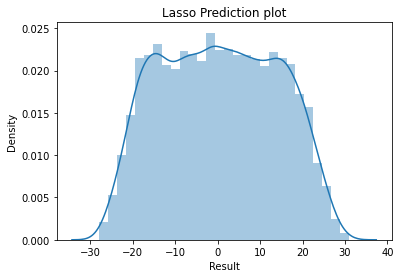

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)
plt.title("Lasso Prediction plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


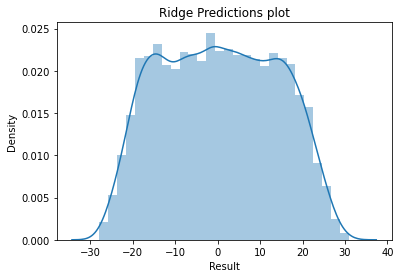

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)
plt.title("Ridge Predictions plot")
plt.show()

In [ ]:
y_preds_final = ridge_regressor.predict(df_pred)

In [ ]:
y_preds_final

array([93.25529502])

In [ ]:
import pickle
filename = 'rfg_best_v1.sav'
pickle.dump(rfg, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'ridge_best_v1.sav'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'lasso_best_v1.sav'
pickle.dump(lasso_regressor, open(filename, 'wb'))

We will choose the model with the lowest RMSE score, or the Random Forest Regression model. 

Ensembling

In [ ]:
# Ensemble both regression models to test inference
ensemble = y_pred_rfg * 0.5 + y_preds_lr * 0.5